<a href="https://colab.research.google.com/github/msboralugoda/Pattern-Recognition/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Author: Sampath K Perera and  Kajhanan Kailainathan

This notebook is based on [this](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) scikit learn tutorial.

## Import the Libraries

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection as  model_selection
#load the dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

## Visualize the dataset

Fetch the California Housing Dataset through the *datasets* module of the *sklearn* library

In [47]:
california_housing = fetch_california_housing(as_frame=True) #Loads and returns the dataset as a Pandas data frame

In [48]:
type(california_housing.data)

pandas.core.frame.DataFrame

The* entire tabular dataset* could be accessed using the **.data** attribute. The .**head()** method is used to visualize *a compact dataframe of only 5 entries*. This can be used to visualize the independent variable values and their names.

In [49]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


The depend variable name and values could be accessed through the .target attribute.

In [50]:
# print dependent variable (y)
california_housing.target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


The **.frame** attribute contains a *Dataframe of both the dependent and independent variables*. The **.info()** method gives *the Column name, Non-Null count (number of entries with non-null values), and Data Type*. Verify by running the code snippet below. Do try out the .info() method on .target and .data attributes as well.

In [51]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [52]:
california_housing.target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [53]:
california_housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


The .hist() method can be called upon a dataframe to plot histogram distribution for each column variables. This can be used to get an idea of the distribution of each of the variables in an independent manner.

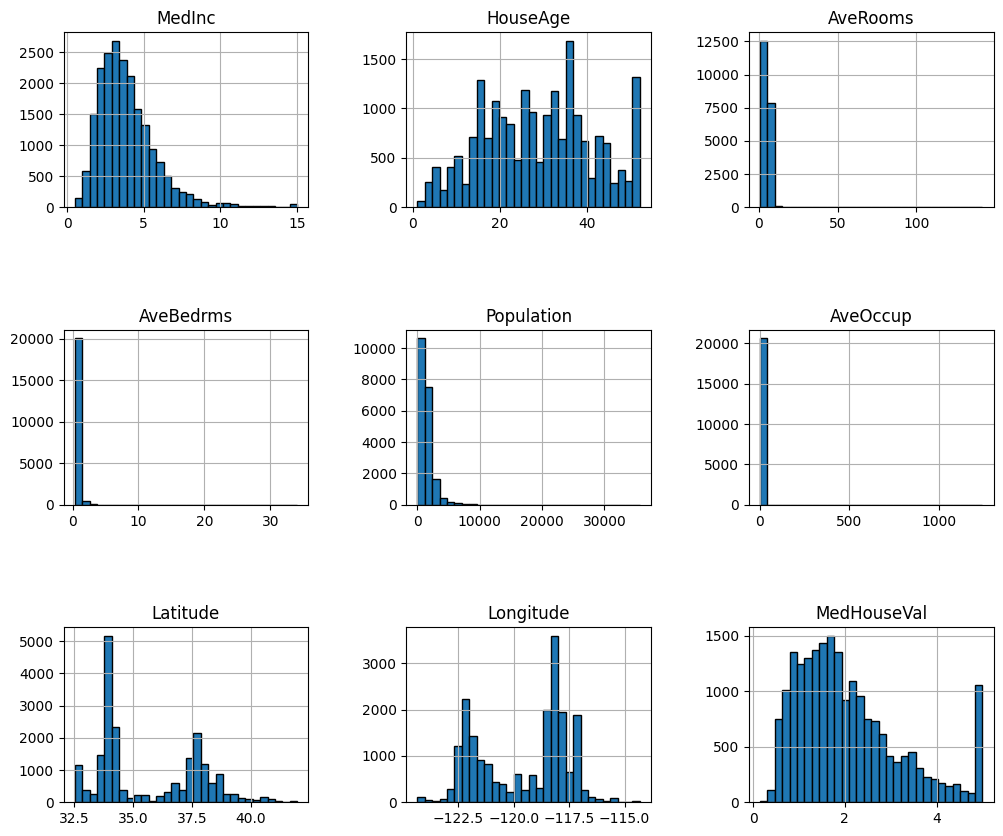

In [54]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## Data Analysis (Checking for Outliers)

From the above variables, the histogram plots of the 'Average Rooms', 'Average Bedrooms', 'Average Occupation', and 'Population' seem to have a significant skew. (i.e), the data is bulged within a short range of the entire range of the data distribution.

This points at a potential source of outliers.

The .describe() method can be called upon the selected features, which gives out the mean, standard deviation, inter quartile range values, and other significant statiscal measures which can be used to analyse the data.

In [55]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


A large gap on the 75th percentile value and the maximum value indicates possible outliers.

## Linear Regression on a Single Variable

Let us perform linear regression on a single variable with potential outliers. We will compare different methods and their performance at the presence of outliers.

In [56]:
features_of_interest = ["AveRooms"]
california_housing.frame[features_of_interest].describe()

,AveRooms
count,20640.000000
mean,5.429000
std,2.474173
min,0.846154
25%,4.440716
50%,5.229129
75%,6.052381
max,141.909091


In [57]:
# Load the  dataset
data_X, data_y = fetch_california_housing(return_X_y=True) #Returns 2 seprate variables

# select the "AveRooms" data
data_X=data_X[:,2] #Select all row of column 3(2 in python)

#save index of the maximum value, will be used later
index_max=np.argmax(data_X)
max_x=data_X[index_max]
max_y=data_y[index_max]

In [58]:
#verification that we have selected correct set
print(np.max(data_X),np.min(data_X),np.mean(data_X))

141.9090909090909 0.8461538461538461 5.428999742190376


Select only 100 datapoints at random and perform regression

In [59]:
#we have lot of data samples, just select 100 of them
data_X=data_X[100:200]
data_y=data_y[100:200]
#remember index starts from 0
# Split the data into training/testing sets

# 80 used to train 20 used to test
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, test_size=0.2, random_state=0)

#Split trainind set to 20 validate and 60 used to train
X_train, X_val, y_train, y_val  = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print("Total dataset elements",data_X.shape)
print("Train dataset elements",X_train.shape)
print("Validatiom dataset elements",X_val.shape)
print("Test dataset elements",X_test.shape)

Total dataset elements (100,)
Train dataset elements (60,)
Validatiom dataset elements (20,)
Test dataset elements (20,)


Most sklearn methods (and also methods from other machine learning libraries), deal with tensors. The above shape (100,) for instance refers to a numpy array of 100 scalar values. However, we must convert this to a numpy array of 100 1 dimensional tensors.

**This intermediate step will be commonly encountered even when working with other Machine Learning libraries, thus is helpful to make a note on this if you are already not aware**

It is encouraged that you visualize the shapes of the X_train and other variables before and after applying the .reshape() method using the .shape attribute

In [60]:
#reshape data as vectors
#print(Shape before reshaping)
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 1)
#print(Shape after reshaping)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1)
X_val = X_val.reshape(X_val.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
yval = y_val.reshape(y_val.shape[0], 1)

(60,)
(60, 1)


The *linear_model.LinearRegression()* module from the *sklearn* library can be used to perform linear regression and tabulate the corresponding variables

In [61]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)


# The intercept
print("Intercept w_0: \n", regr.intercept_)
# The coefficients
print("Coefficient w_1: \n", regr.coef_)



Intercept w_0: 
 [-0.20304646]
Coefficient w_1: 
 [[0.5105445]]


Instead of using the *linear_model.LinearRegression()* module, the known equation $\hat{\beta} = (X^T X)^{-1}X^T y$ can be directly applied using numpy methods.

Verify that both the answers are the same

In [62]:
import numpy as np



# Reshape y_train to ensure it's a column vector
# Make this a column vector, and figure out the number of rows automatically
y_train = y_train.reshape(-1, 1)

# Add a column of 1s to X_train for the intercept term
intercept = np.ones((X_train.shape[0], 1))
X_train_with_intercept = np.hstack((intercept, X_train))

# Calculate beta_hat using the normal equation
X_transpose = X_train_with_intercept.T
X_transpose_X = np.dot(X_transpose, X_train_with_intercept)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)
X_transpose_y = np.dot(X_transpose, y_train)
beta_hat = np.dot(X_transpose_X_inv, X_transpose_y)

# Extract the intercept and coefficients
intercept_hat = beta_hat[0]
coefficients = beta_hat[1:]

print("Intercept w_0 :", intercept_hat)
print("Coefficient w_1:", coefficients)


Intercept w_0 : [-0.20304646]
Coefficient w_1: [[0.5105445]]


The variables RSS (Residual Sum of Squares), RSE (Residual Standard Error), and TSS (Total Sum of Squares) can be tabulated as shown below by directly applying numpy methods. The predicted values are obtained using the .predict() method from the instantiation of linear_model.LinearRegression().

In [63]:
yhat=regr.predict(X_train)

# Residual Sum of Sqaures (RSS)
RSS = np.sum((yhat - y_train)**2)
print('RSS=', RSS)

N=len(y_train)
print('Number of Datapoints=',N)

# Residual Standard Error (RSE)
RSE = np.sqrt(1/(N-2)*RSS)
print('RSE=', RSE)

# Total Sum of Squares (TSS)
TSS = np.sum((y_train- np.mean(y_train))**2)
print('TSS=', TSS)

R2 = (TSS - RSS)/TSS
print('R2 (from direct calculations)=', R2)

# Calculation of R2 using sklearn
R2 = regr.score(X_train,y_train)

print('R2 (from sklearn module)=', R2)

RSS= 21.895688808521484
Number of Datapoints= 60
RSE= 0.6144199508552689
TSS= 49.8547606
R2 (from direct calculations)= 0.5608104713570425
R2 (from sklearn module)= 0.5608104713570425


Calculate the t-statistic and p-values

In [64]:
from scipy.stats import t


w_1=regr.coef_
w_0=regr.intercept_
sigma2 = np.var(y_train - yhat)
SE2w0 =  sigma2*(1/N + np.mean(X_train)**2/np.sum((X_train - np.mean(X_train))**2))
SE2w1 = sigma2/np.sum((X_train - np.mean(X_train))**2)
tw1 = (w_1 - 0)/np.sqrt(SE2w1)
tw0 = (w_0 - 0)/np.sqrt(SE2w0)

print('Standard errors for intecept and w1: ', SE2w0, SE2w1)
print('t-statistic for intecept and w1: ', tw0, tw1)
pw1 = t.sf(np.abs(tw1), N-2)

pw0 = t.sf(np.abs(tw0), N-2)
print('p-value  for intecept and w1: ', pw0, pw1)

Standard errors for intecept and w1:  0.08971708426143732 0.0034021371404027827
t-statistic for intecept and w1:  [-0.67788785] [[8.75301542]]
p-value  for intecept and w1:  [0.25026914] [[1.69850512e-12]]


Use the calculated regression coefficients, and check its validity,
1. Quantitatively : Using Mean squared error and Coefficient of Determination
2. Qualitatively : By plotting and visualizing the test datapoints as a scatter plot against the regression line

Mean squared error: 0.28
Coefficient of determination: 0.75


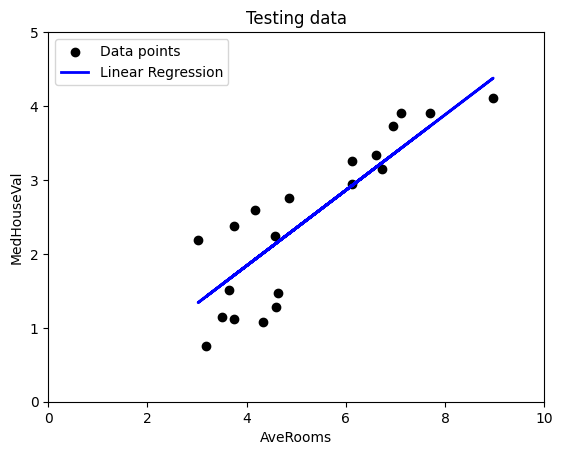

In [65]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)



# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Data points')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Testing data")
plt.show()

The coeffeicient of determination value is well above 0.5. This means that the regression method has worked to some length. However, we should also consider the fact that outliers could have been removed when we took a random sample of the training set to determine the regression coefficients.

Let us observe how the presence of outliers impacts the regression method.

## Regression with Outliers

Perform regression after including the maximum x and corresponding y value

Coefficients: 
 [[0.0221863]]
intercept: 
 [2.23035286]


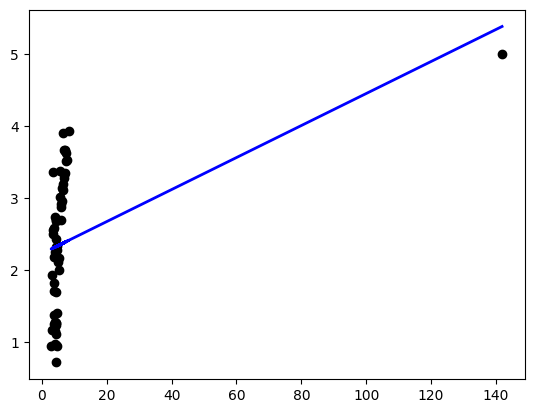

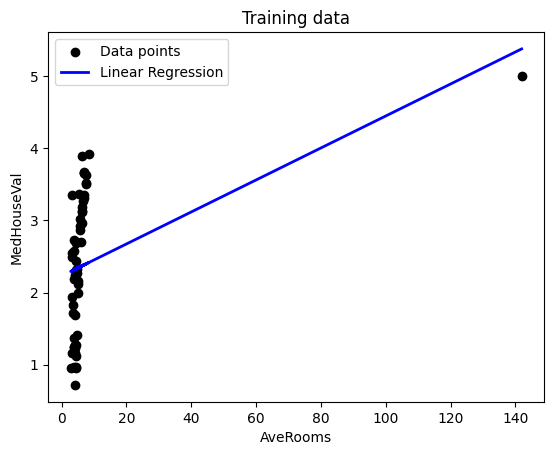

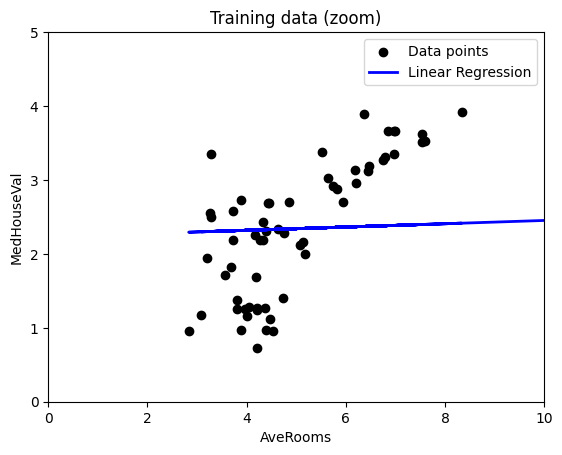

Coefficients: 
 [[0.0221863]]
Coefficients: 
 [2.23035286]


In [66]:
# load maximum x value and corresponding y value to the training dataset
X_train[59,:]=max_x
y_train[59,:]=max_y
# Train the model using the training sets
regr.fit(X_train, y_train)
# The coefficients
print("Coefficients: \n", regr.coef_)
print("intercept: \n", regr.intercept_)

#see how training line look like


# Plot outputs
plt.scatter(X_train, y_train, color="black", )
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2)

plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.title("Training data")
plt.show()
plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Training data (zoom)")
plt.show()


# The coefficients
print("Coefficients: \n", regr.coef_)
# The intercept
print("Coefficients: \n", regr.intercept_)

See the predictions using test set

Mean squared error: 1.06
Coefficient of determination: 0.05


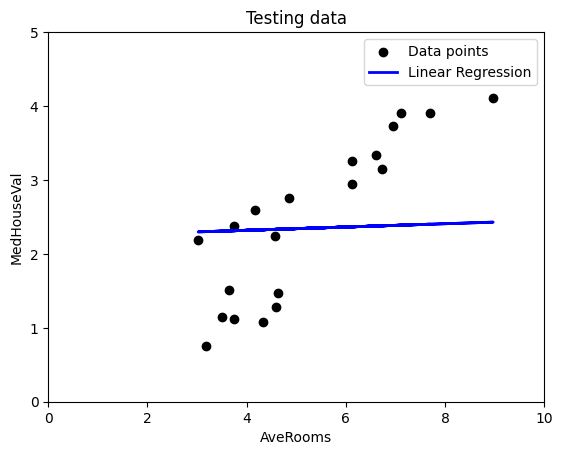

In [67]:
y_pred = regr.predict(X_test)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))




# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Data points')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label=r'Linear Regression')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Testing data")
plt.show()

## RANSAC (RANdom SAmple Consensus)

RANSAC is an iterative parameter estimation method that performs well even at the presence of outliers. Click [this](http://www.cse.yorku.ca/~kosta/CompVis_Notes/ransac.pdf) to learn more about RANSAC.

*linear_model.RANSACRegressor()* from *sklearn* is used to implement the RANSAC algorithm.

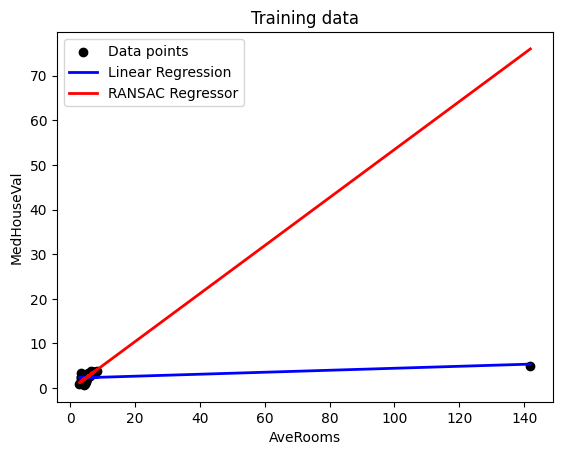

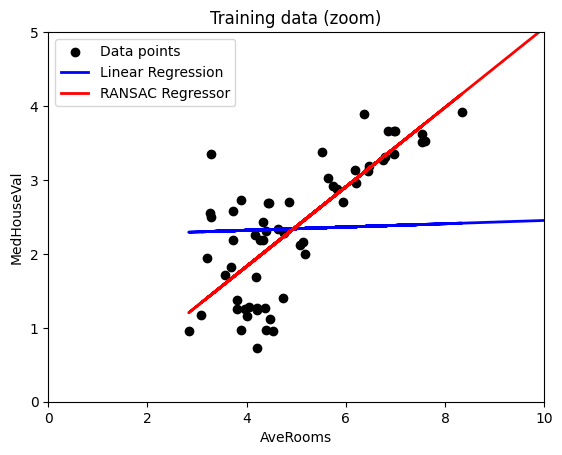

In [68]:
# Train the model using the training sets
ransac = linear_model.RANSACRegressor()
#The RANSAC regressor automatically splits the data into inliers and outliers, and the fitted line is determined only by the identified inliers.

ransac.fit(X_train, y_train)

# Plot outputs
plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')
plt.plot(X_train, ransac.predict(X_train), color="red", linewidth=2, label=r'RANSAC Regressor')

plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.title("Training data")
plt.show()
plt.subplots(1, 1)
plt.scatter(X_train, y_train, color="black", label='Data points')
plt.plot(X_train,  regr.predict(X_train), color="blue", linewidth=2, label=r'Linear Regression')
plt.plot(X_train, ransac.predict(X_train), color="red", linewidth=2, label=r'RANSAC Regressor')

plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Training data (zoom)")
plt.show()

Predict values with test data

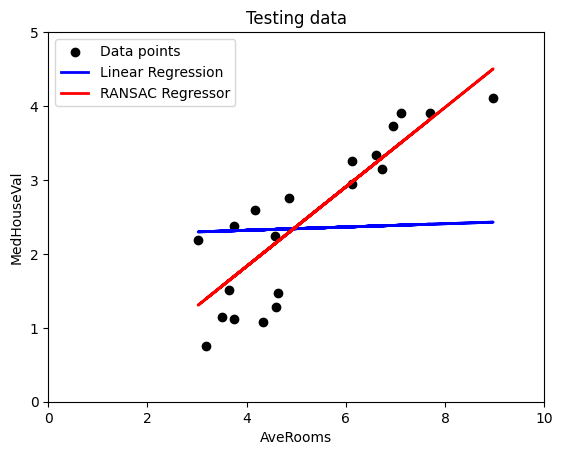

In [69]:
line_y_ransac = ransac.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test, color="black", label='Data points')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label=r'Linear Regression')
plt.plot(X_test, line_y_ransac, color="red", linewidth=2, label=r'RANSAC Regressor')


plt.legend(loc='best')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.ylim((0,5))
plt.xlim((0,10))
plt.title("Testing data")
plt.show()


## Polynomial Regression


Polynomial Regression assumes that the function to be fitted is a polynomial function.

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called **underfitting**, i.e., a model is too simplistic to capture the
underlying patterns in the data. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e., a model performs
exceptionally well on the training data but fails to generalize to
new, unseen data. We evaluate quantitatively **overfitting** / **underfitting** by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

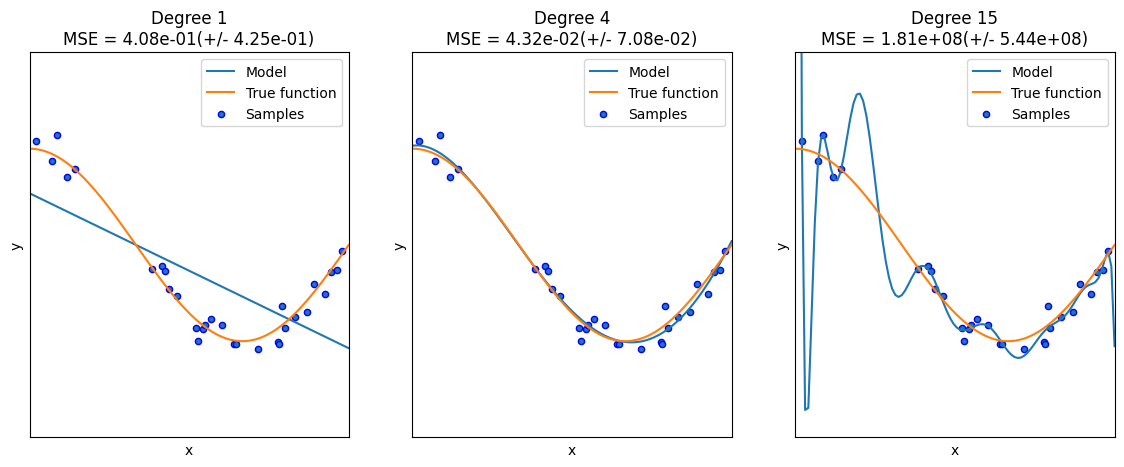

In [71]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = linear_model.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

# plt.savefig('./figures/polynomial_regresion.png')
plt.show()

## Polynomial Ridge Regression

Ridge regression is a regularization technique that can be utilized by maintaining a loss function of the following form.

$Loss = MSE + \lambda ||w||^2_2$

This leads to a parameter estimator equations,

$\hat{\beta}_{ridge} = (X^T X + \lambda I_p)^{-1}X^T y$

It can be understood from the example below that ridge regression controls the overfitting problem, as the degree 15 polynomial fits the ground truth reasonably well.

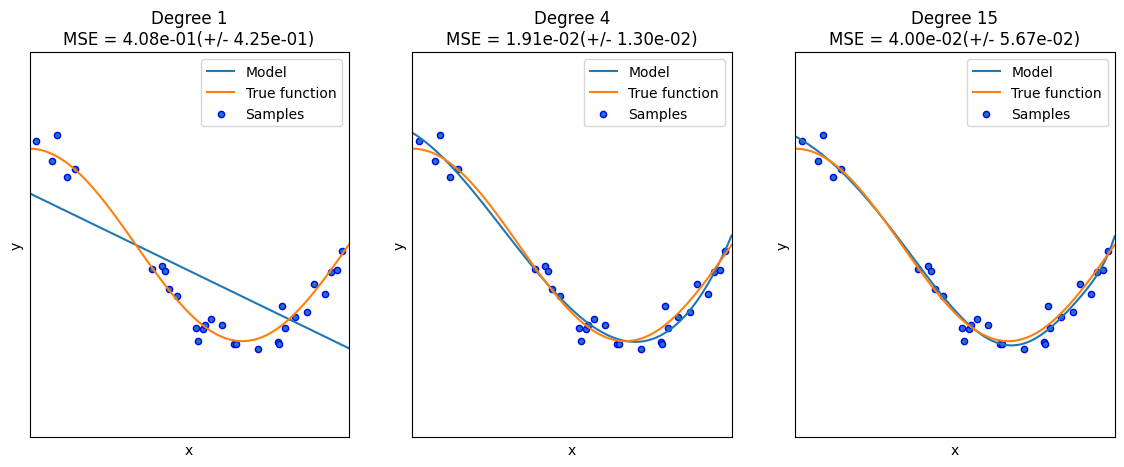

In [72]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
alpha = 0.0001 # lambda in the slides

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    ridge = linear_model.Ridge(alpha=alpha, fit_intercept=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge_regresssion", ridge)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

# plt.savefig('./figures/polynomial_ridge_regresion.png')
plt.show()

## Ridge Coefficients as a Function of the Regularization

This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, **a slight change in the target variable can cause huge variances in the calculated weights**. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.

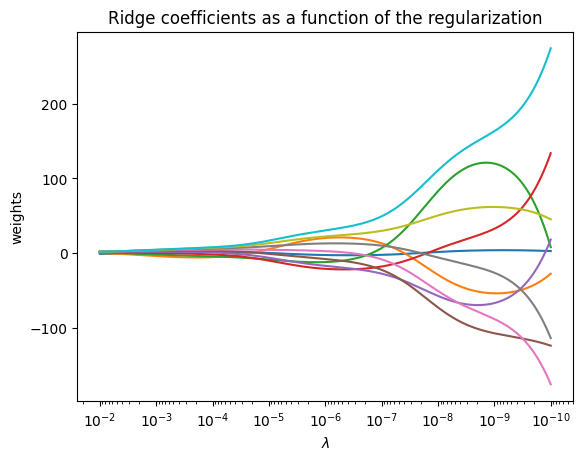

In [73]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause


# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('$\lambda$')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
# plt.savefig('./figures/redge_coeff_regularization.png')
plt.show()

## LASSO Regression

Lasso regression is a regularization technique that can be utilized by maintaining a loss function of the following form.

$Loss = MSE + \lambda ||w||_1$

Compare this with the ridge regression equation.

 Lasso regression is generally used in cases where it is preferable to have a sparse representation of the model. This is illustrated in the example below, where using Lasso regression, many coefficients are forced to be zero
 .

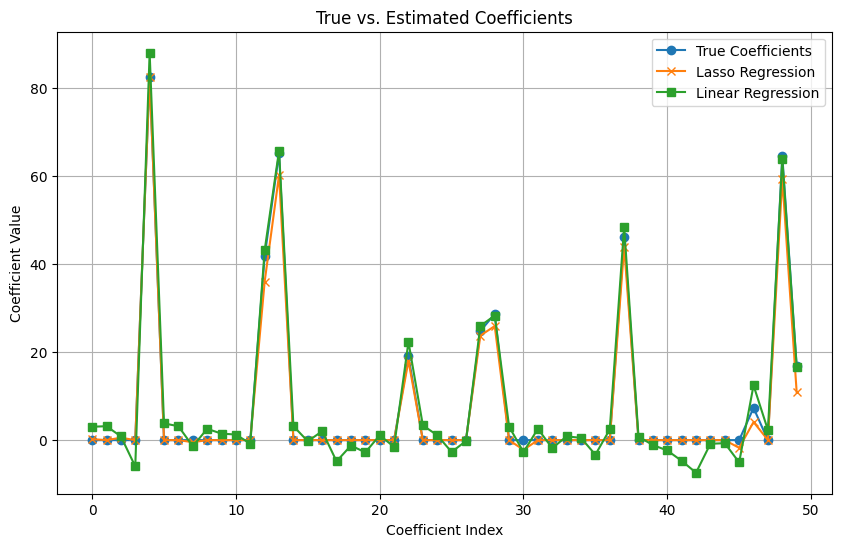

Number of non-zero coefficients (Linear Regression): 50
Number of non-zero coefficients (Lasso Regression): 16


In [74]:
from sklearn.linear_model import  Lasso
from sklearn.datasets import make_regression

# Generate synthetic data with informative and irrelevant features
X, y, true_coefficients = make_regression(
    n_samples=100, n_features=50, n_informative=10, noise=20.5, coef=True, random_state=42
)

# Create a Lasso regression model
lasso_model = Lasso(alpha=3)  # Alpha is the regularization strength

# Fit the Lasso regression model to the data
lasso_model.fit(X, y)

# Create a Linear Regression model
simple_linear_model = linear_model.LinearRegression()

# Fit the Linear Regression model to the data
simple_linear_model.fit(X, y)

# Plot the true coefficients and the estimated coefficients for Lasso and Linear Regression
plt.figure(figsize=(10, 6))

plt.plot(true_coefficients, label='True Coefficients', marker='o')
plt.plot(lasso_model.coef_, label='Lasso Regression', marker='x')
plt.plot(simple_linear_model.coef_, label='Linear Regression', marker='s')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('True vs. Estimated Coefficients')
plt.legend()
plt.grid()
plt.show()



print("Number of non-zero coefficients (Linear Regression):", np.sum(simple_linear_model.coef_ != 0))
print("Number of non-zero coefficients (Lasso Regression):", np.sum(lasso_model.coef_ != 0))

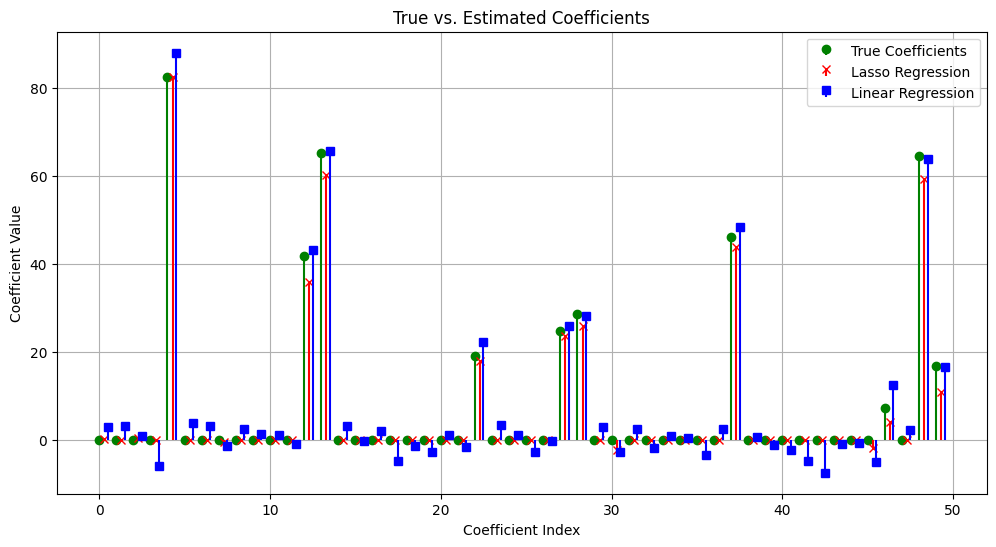

In [75]:
plt.figure(figsize=(12, 6))

# Plot the true coefficients as stem plot
plt.stem(range(len(true_coefficients)), true_coefficients, markerfmt='go', linefmt='g', basefmt=' ')

# Plot the Lasso coefficients as stem plot with a small offset
plt.stem(np.arange(len(true_coefficients)) + 0.3, lasso_model.coef_, markerfmt='rx', linefmt='r', basefmt=' ')

# Plot the Linear Regression coefficients as stem plot with a larger offset
plt.stem(np.arange(len(true_coefficients)) + 0.5, simple_linear_model.coef_, markerfmt='bs', linefmt='b', basefmt=' ')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('True vs. Estimated Coefficients')
plt.legend(['True Coefficients', 'Lasso Regression', 'Linear Regression'])
plt.grid()
plt.show()

## Multi Variable Linear regression

Review the code given below on multivariable linear regression

In [76]:
#load the dataset
from sklearn.datasets import fetch_california_housing

# Load the diabetes dataset
data_X, data_y = fetch_california_housing(return_X_y=True)

#remember index starts from 0
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_X, data_y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val  = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print("Total dataset elements",data_X.shape)
print("Train dataset elements",X_train.shape)
print("Validatiom dataset elements",X_val.shape)
print("Test dataset elements",X_test.shape)

Total dataset elements (20640, 8)
Train dataset elements (12384, 8)
Validatiom dataset elements (4128, 8)
Test dataset elements (4128, 8)


Using sklearn to fit the parameters and find the regression coefficients.

In [77]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The intercept
print("Coefficients: \n", regr.intercept_)

y_pred = regr.predict(X_test)



# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

#see the impact of each variable

regr_coef=regr.coef_/np.max(regr.coef_)
print("Coefficients: \n", regr_coef)
#Here, value=1 is the most relevant feature.
california_housing = fetch_california_housing(as_frame=True)
california_housing.data.head()

Coefficients: 
 [ 4.52681080e-01  9.44835024e-03 -1.30201996e-01  8.24878307e-01
 -5.84727391e-06 -7.62397662e-03 -4.06305340e-01 -4.18414937e-01]
Coefficients: 
 -35.66840017162281
Mean squared error: 0.53
Coefficient of determination: 0.59
Coefficients: 
 [ 5.48785288e-01  1.14542353e-02 -1.57843885e-01  1.00000000e+00
 -7.08865036e-06 -9.24254711e-03 -4.92563977e-01 -5.07244443e-01]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Calculating p values

In [78]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have already fitted the linear regression model (regr.fit(X_train, y_train))

# Add a constant column to the feature matrix (required by statsmodels)
X_train_with_constant = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_constant).fit()

# Get summary statistics of the model
summary = ols_model.summary()

# Extract p-values from the summary for all features
p_values = summary.tables[1].data[1:]

# Create a DataFrame to associate p-values with feature names
p_values_df = pd.DataFrame(p_values, columns=['Feature', 'Coefficient', 'Standard Error', 't-value', 'P-Value', 'Lower CI', 'Upper CI'])
p_values_df['P-Value'] = p_values_df['P-Value'].astype(float)


print(summary)
print(p_values_df)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2461.
Date:                Fri, 08 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:00:04   Log-Likelihood:                -13464.
No. Observations:               12384   AIC:                         2.695e+04
Df Residuals:                   12375   BIC:                         2.701e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.6684      0.849    -42.006      0.0

Calculating Standard errors and t-values

In [79]:
from scipy import stats
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_train)

newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b



sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)

params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"] = [params,sd_b,ts_b]
print(myDF3)

   Coefficients  Standard Errors  t values
0      -35.6684            0.849   -42.006
1        0.4527            0.006    81.204
2        0.0094            0.001    16.493
3       -0.1302            0.008   -16.185
4        0.8249            0.041    20.252
5       -0.0000            0.000    -0.951
6       -0.0076            0.001    -6.442
7       -0.4063            0.009   -43.858
8       -0.4184            0.010   -43.176
